# OpenCV Tutorial

**Reference**: https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

In [0]:
%cd /content/drive/My Drive/Computer Vision/OpenCV

/content/drive/My Drive/Computer Vision/OpenCV


## Install OpenCV

In [0]:
!pip install imutils

## Loading and displaying an image

In [0]:
import imutils
import cv2
import matplotlib.pyplot as plt

In [0]:
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread("jp.png")
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=322, depth=3


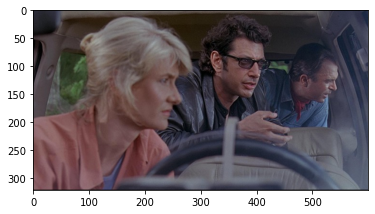

In [0]:
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to continue execution
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


## Array slicing and cropping
Extracting “regions of interest” (ROIs) is an important skill for image processing.

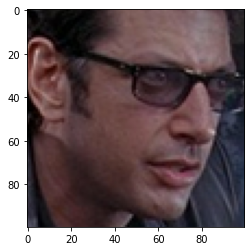

In [0]:
roi = image[60:160, 320:420]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.show()

## Resizing images
Let’s resize our original image to 200 x 200 pixels:

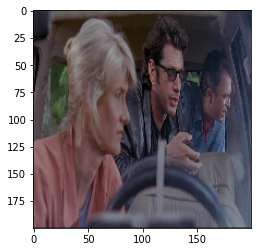

In [0]:
resized = cv2.resize(image, (200,200))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.show()

Let’s calculate the aspect ratio of the original image and use it to resize an image so that it doesn’t appear squished and distorted

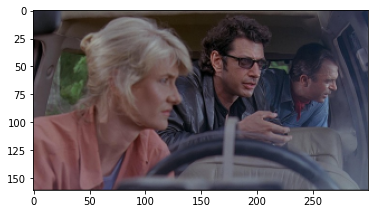

In [0]:
r = 300.0/w
dim = (300, int(h*r))
resized = cv2.resize(image, dim)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.show()

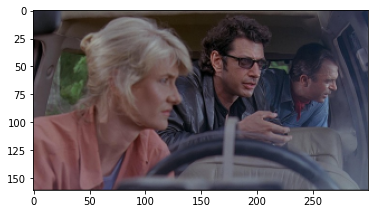

In [0]:
resized = imutils.resize(image, width=300)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.show()

## Rotating an image



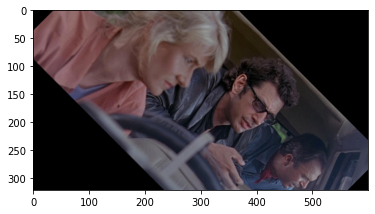

In [0]:
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w,h))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

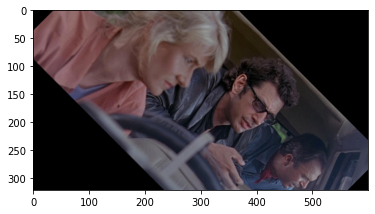

In [0]:
rotated = imutils.rotate(image, -45)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

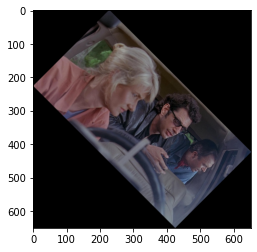

In [0]:
rotated = imutils.rotate_bound(image, 45)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

## Smoothing  an image

In many image processing pipelines, we must blur an image to reduce high-frequency noise, making it easier for our algorithms to detect and understand the actual contents of the image rather than just noise that will “confuse” our algorithms

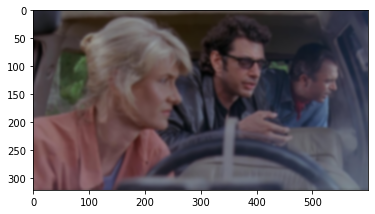

In [0]:
blurred = cv2.GaussianBlur(image, (11,11), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.show()

## Drawing on image

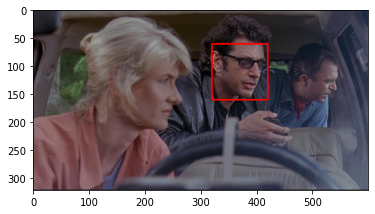

In [0]:
output = image.copy()
cv2.rectangle(output, (320,60), (420, 160), (0,0,256), 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

cv2.rectangle：

- img : The destination image to draw upon. We’re drawing on output .
- pt1 : Our starting pixel coordinate which is the top-left. In our case, the top-left is (320, 60) .
- pt2 : The ending pixel — bottom-right. The bottom-right pixel is located at (420, 160) .
- color : BGR tuple. To represent red, I’ve supplied (0 , 0, 255) .
- thickness : Line thickness (a negative value will make a solid rectangle). I’ve supplied a thickness of 2 .

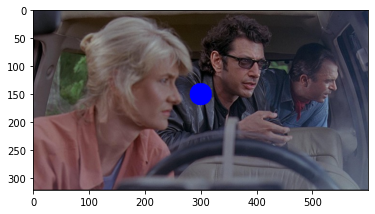

In [0]:
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

cv2.circle :

- img : The output image.
center : Our circle’s center coordinate. I supplied (300, 150)  which is right in front of Ellie’s eyes.
- radius : The circle radius in pixels. I provided a value of 20  pixels.
- color : Circle color. This time I went with blue as is denoted by 255 in the B and 0s in the G + R components of the BGR tuple, (255, 0, 0) .
-thickness : The line thickness. Since I supplied a negative value (-1 ), the circle is solid/filled in.

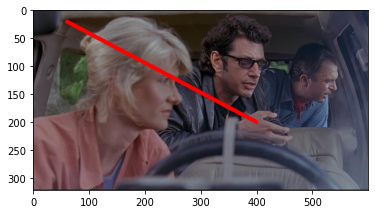

In [0]:
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

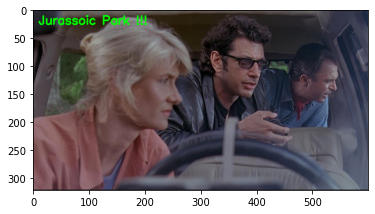

In [0]:
output = image.copy()
cv2.putText(output, "Jurassoic Park !!!", (10,25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

cv2.putText:

- img : The output image.
- text : The string of text we’d like to write/draw on the image.
- pt : The starting point for the text.
- font : I often use the cv2.FONT_HERSHEY_SIMPLEX . The available fonts are listed here.
- scale : Font size multiplier.
- color : Text color
- thickness : The thickness of the stroke in pixels.

In [0]:
!python opencv_tutorial_01.py

width=600, height=322, depth=3
: cannot connect to X server 


# Counting objects

Reference: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e

In [0]:
import numpy as np

In [0]:
original = cv2.imread("/content/drive/My Drive/Computer Vision/OpenCV/Tutorial/1.jpg")

## Pre-Processing

### Convert image in grayscale

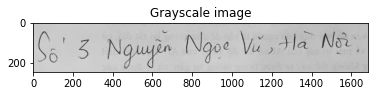

In [0]:
gray_im = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
# plt.subplot(221)
plt.title("Grayscale image")
plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)
plt.show()

### Constrat adjusting with gamma correction y = 1.2

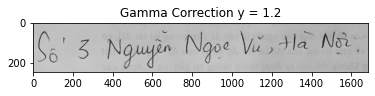

In [0]:
gray_correct = np.array(255 * (gray_im / 255)**1.2, dtype='uint8')
plt.title("Gamma Correction y = 1.2")
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)
plt.show()

### Constrat adjusting with histogram equalization

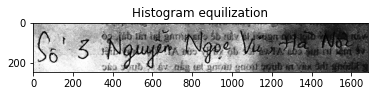

In [0]:
gray_equ = cv2.equalizeHist(gray_im)
plt.title("Histogram equilization")
plt.imshow(gray_equ, cmap="gray", vmin=0, vmax=255)
plt.show()

## Processing

Sử dụng kỹ thuật ngưỡng để phân đoạn.
Trong bài này, sử dụng adaptive local thresold technique (kỹ thuật ngưỡng địa phương thích ứng) - hình ảnh grayscale được điều chỉnh độ tương phản 

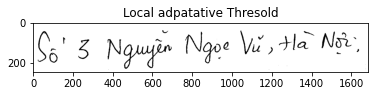

In [0]:
# Local adaptative threshold

thresh = cv2.adaptiveThreshold(gray_correct, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 19)
# thresh = cv2.bitwise_not(thresh)
plt.title('Local adpatative Thresold')
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
plt.show()

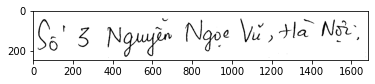

In [0]:
img_subtract = cv2.subtract(255, thresh)

plt.imshow(img_subtract, cmap="gray", vmin=0, vmax=255)
plt.show()

Chúng ta sẽ đi theo các kỹ thuật erosion(theo loi mon) và dilatation(co gian), điều này sẽ giúp chúng tôi kết nối các khu vực gần nhất để có khu vực trên mỗi đối tượng.

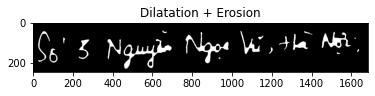

In [0]:
### Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilatation = cv2.dilate(thresh, kernel, iterations=1)
img_erode = cv2.erode(img_dilatation, kernel, iterations=1)

### Clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)

plt.title("Dilatation + Erosion")
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)
plt.show()

## Labeling

In [0]:
ret, labels = cv2.connectedComponents(img_erode)
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

object number is:  19


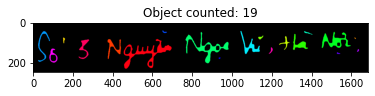

In [0]:
plt.title("Object counted: " + str(ret-1))
plt.imshow(labeled_img)

print("object number is: ", ret-1)
plt.show()